In [1]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available and activated!")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("GPU is NOT available.")


GPU is available and activated!
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
train_dir = r"C:\deepfake\dataset deepfake images\Train"
valid_dir = r"C:\deepfake\dataset deepfake images\Validation"
test_dir = r"C:\deepfake\dataset deepfake images\Test"

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

In [5]:


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 20000 images belonging to 2 classes.


In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 4000 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 4000 images belonging to 2 classes.


In [8]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [10]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [23]:
# STEPS_PER_EPOCH = 28000/BATCH_SIZE

In [22]:
# VALIDATION_STEPS = 4000/BATCH_SIZE

In [24]:
# Compute steps per epoch dynamically
import math
STEPS_PER_EPOCH = math.ceil(len(train_generator.filenames) / BATCH_SIZE)
VALIDATION_STEPS = math.ceil(len(validation_generator.filenames) / BATCH_SIZE)

In [11]:
# Define the checkpoint path
checkpoint_path = r"C:\deepfake\dataset deepfake images\checkpoint\cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [12]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch'  # Saves at the end of each epoch
)

In [13]:
model.save_weights(checkpoint_path.format(epoch=0))

In [14]:
os.listdir(checkpoint_dir)

['checkpoint',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index']

In [13]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [14]:
latest

'C:\\deepfake\\dataset deepfake images\\checkpoint\\cp-0014.ckpt'

In [15]:
# Load weights if a checkpoint exists
if latest:
    model.load_weights(latest)
    print("✅ Successfully loaded weights from checkpoint.")

✅ Successfully loaded weights from checkpoint.


In [28]:
# Extract last saved epoch number
import re
initial_epoch = 0  # Default if no checkpoint exists
if latest:
    print(f"✅ Found checkpoint: {latest}")
    
    # Extract epoch number from checkpoint filename (e.g., 'cp-0005.ckpt' → 5)
    match = re.search(r"cp-(\d+)\.ckpt", latest)
    if match:
        initial_epoch = int(match.group(1))  # Convert to int
        print(f"🔄 Resuming from epoch {initial_epoch}")
else:
    print("❌ No checkpoint found! Starting training from scratch.")

✅ Found checkpoint: C:\deepfake\dataset deepfake images\checkpoint\cp-0002.ckpt
🔄 Resuming from epoch 2


In [29]:
EPOCHS = 20
history = model.fit(
    train_generator,
    steps_per_epoch = STEPS_PER_EPOCH,
    batch_size = BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = VALIDATION_STEPS,
    callbacks = [cp_callback],
    verbose = 1,
    epochs = EPOCHS,
    initial_epoch=initial_epoch,
)

Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 0.2349 - accuracy: 0.9003
Epoch 3: saving model to C:\deepfake\dataset deepfake images\checkpoint\cp-0003.ckpt
625/625 [==============================] - 557s 891ms/step - loss: 0.2349 - accuracy: 0.9003 - val_loss: 0.2176 - val_accuracy: 0.9080
Epoch 4/20
625/625 [==============================] - ETA: 0s - loss: 0.1934 - accuracy: 0.9194
Epoch 4: saving model to C:\deepfake\dataset deepfake images\checkpoint\cp-0004.ckpt
625/625 [==============================] - 361s 577ms/step - loss: 0.1934 - accuracy: 0.9194 - val_loss: 0.1565 - val_accuracy: 0.9373
Epoch 5/20
625/625 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9303
Epoch 5: saving model to C:\deepfake\dataset deepfake images\checkpoint\cp-0005.ckpt
625/625 [==============================] - 443s 708ms/step - loss: 0.1725 - accuracy: 0.9303 - val_loss: 0.1882 - val_accuracy: 0.9230
Epoch 6/20
625/625 [==============================] 

KeyboardInterrupt: 

In [21]:
import json
import os

history_path = "C:\\deepfake\\dataset deepfake images\\checkpoint\\history.json"

# Function to load existing history (if any)
def load_previous_history():
    if os.path.exists(history_path):
        with open(history_path, "r") as f:
            return json.load(f)
    return {}

# Load history if available (only from now on)
previous_history = load_previous_history()


# Merge & Save History
for key in history.history:
    if key in previous_history:
        previous_history[key] += history.history[key]
    else:
        previous_history[key] = history.history[key]

# Save updated history
with open(history_path, "w") as f:
    json.dump(previous_history, f)

print("✅ Training history saved successfully from the current epoch!")


✅ Training history saved successfully from the current epoch!


In [16]:
import os
checkpoint_path = r"C:\deepfake\dataset deepfake images\checkpoint\cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [17]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [18]:
latest

'C:\\deepfake\\dataset deepfake images\\checkpoint\\cp-0014.ckpt'

In [19]:
# Load weights if a checkpoint exists
if latest:
    model.load_weights(latest)
    print("✅ Successfully loaded weights from checkpoint.")

✅ Successfully loaded weights from checkpoint.


In [33]:
scores = model.evaluate(test_generator)

125/125 [==============================] - 76s 604ms/step - loss: 0.2987 - accuracy: 0.8975


In [34]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 875.0}

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
# plt.legend(loc='lower rigth')
# plt.title('Traning and Validation Accuracy')

# plt.subplot(1,2,2)
# plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
# plt.legend(loc = 'upper right')
# plt.title('Training and Validation Loss')
# plt.show()

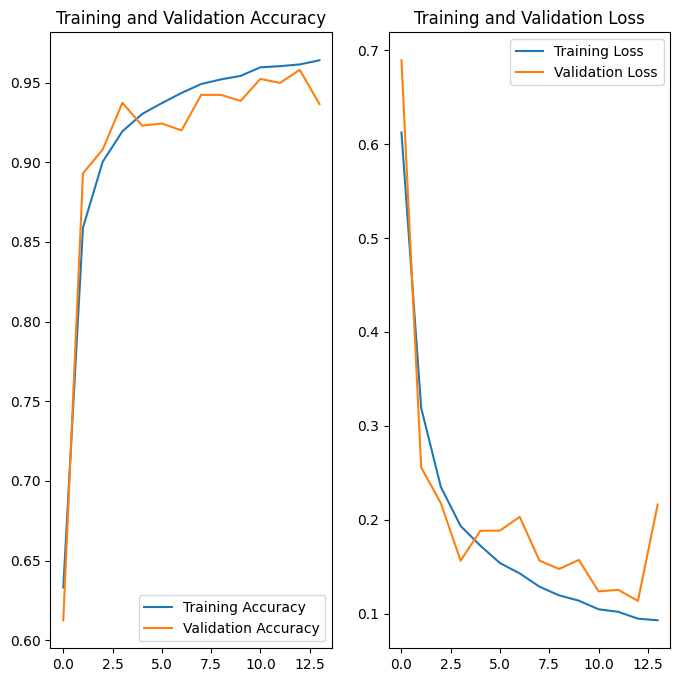

In [41]:
import json
import matplotlib.pyplot as plt

# Load the history from JSON file
with open(r"C:\deepfake\dataset deepfake images\checkpoint\history.json", "r") as f:
    history = json.load(f)

# Extract data
epochs = range(len(history["loss"]))
acc = history["accuracy"]
val_acc = history["val_accuracy"]
loss = history["loss"]
val_loss = history["val_loss"]

# Plot the training history
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()


first image to predict
actual label: Fake
1/1 [==============================] - 1s 983ms/step
predicted label: Fake


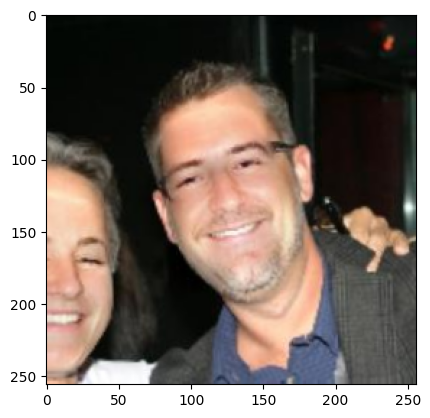

In [18]:
train_generator.class_indices
class_names = list(train_generator.class_indices.keys())
class_names
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [19]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 41ms/step


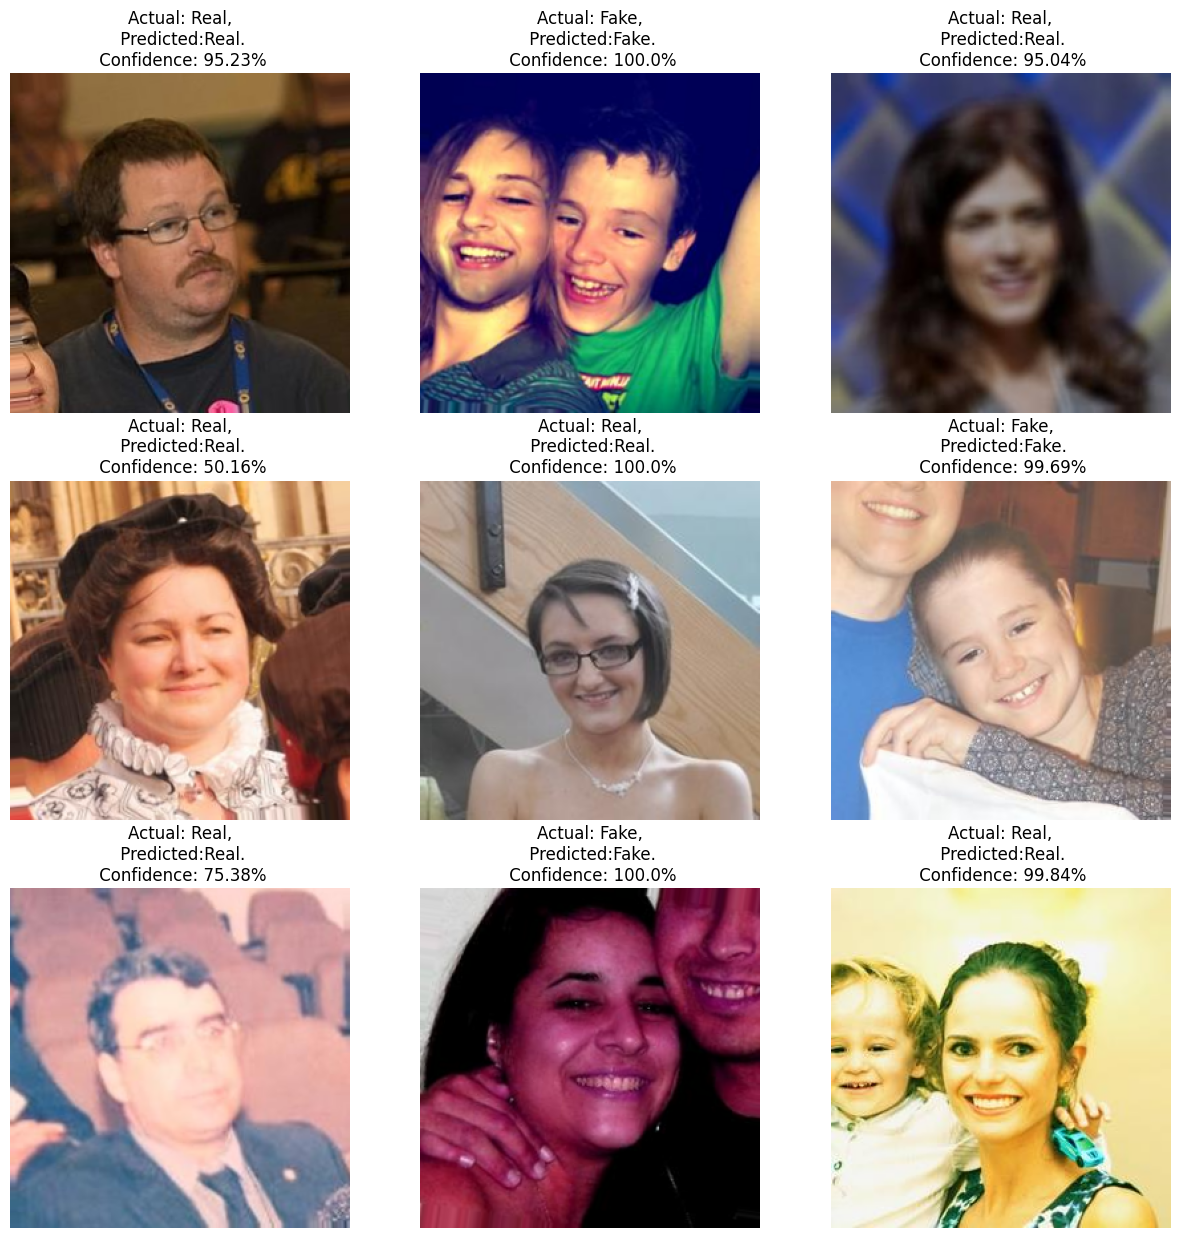

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [20]:
model.save(r"C:\deepfake\dataset deepfake images\models\cnnImagedeepfakemodel.h5",include_optimizer=True)

In [21]:
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
MODEL = tf.keras.models.load_model(r"C:\deepfake\dataset deepfake images\models\cnnImagedeepfakemodel.h5")
CLASS_NAMES = ["fake","real"]
image = tf.keras.preprocessing.image.load_img(r"C:\deepfake\dataset deepfake images\Test\Real\real_4.jpg", target_size = (256,256))
images = tf.keras.preprocessing.image.img_to_array(image)
img_batch = np.expand_dims(image,0)
prediction = MODEL.predict(img_batch)
predicted_class = CLASS_NAMES[np.argmax(prediction[0])]
confidence = round(100 * (np.max(prediction[0])), 2)
print(prediction[0],predicted_class, confidence,np.max(prediction[0]))

1/1 [==============================] - 0s 113ms/step
[0. 1.] real 100.0 1.0
